In [1]:
library(readxl)
library(dplyr)

customer_r <- read_excel("customer_r.xlsx")
reservation_r <- read_excel("reservation_r.xlsx")
order_info_r <- read_excel("order_info_r.xlsx")
item_r <- read_excel("item_r.xlsx")
colnames(customer_r) <- tolower(colnames(customer_r))
colnames(reservation_r) <- tolower(colnames(reservation_r))
colnames(order_info_r) <- tolower(colnames(order_info_r))
colnames(item_r) <- tolower(colnames(item_r))

Warning message:
"package 'readxl' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [2]:
df_cfm_order <- inner_join(reservation_r, order_info_r, by = "reserv_no") %>%
    select(customer_id, reserv_no, visitor_cnt, cancel, order_no, item_id, sales) %>%
arrange(customer_id, reserv_no, item_id)

In [3]:
head(df_cfm_order)

customer_id,reserv_no,visitor_cnt,cancel,order_no,item_id,sales
W1327595,2019061801,2,N,190618107186310010,M0001,48000
W1327595,2019071801,4,N,190718107186310010,M0005,140000
W1327803,2019060301,4,N,190603578341100100,M0005,140000
W1327803,2019091506,2,N,190915137187310010,M0005,70000
W1328432,2019060601,4,N,190606607189610010,M0005,140000
W1328432,2019060601,4,N,190606607189610010,M0010,12000


In [7]:
df_sct_graph <- df_cfm_order %>%
group_by(customer_id) %>%
summarise(vst_cnt = sum(visitor_cnt), cust_amt = sum(sales/1000))

In [8]:
head(df_sct_graph)     

customer_id,vst_cnt,cust_amt
W1327595,6,188
W1327803,6,210
W1328432,20,246
W1328505,20,287
W1328786,1,10
W1328985,8,178


In [14]:
install.packages('ggplot2')
library(ggplot2)
library(dplyr)

Warning message:
"package 'ggplot2' is in use and will not be installed"

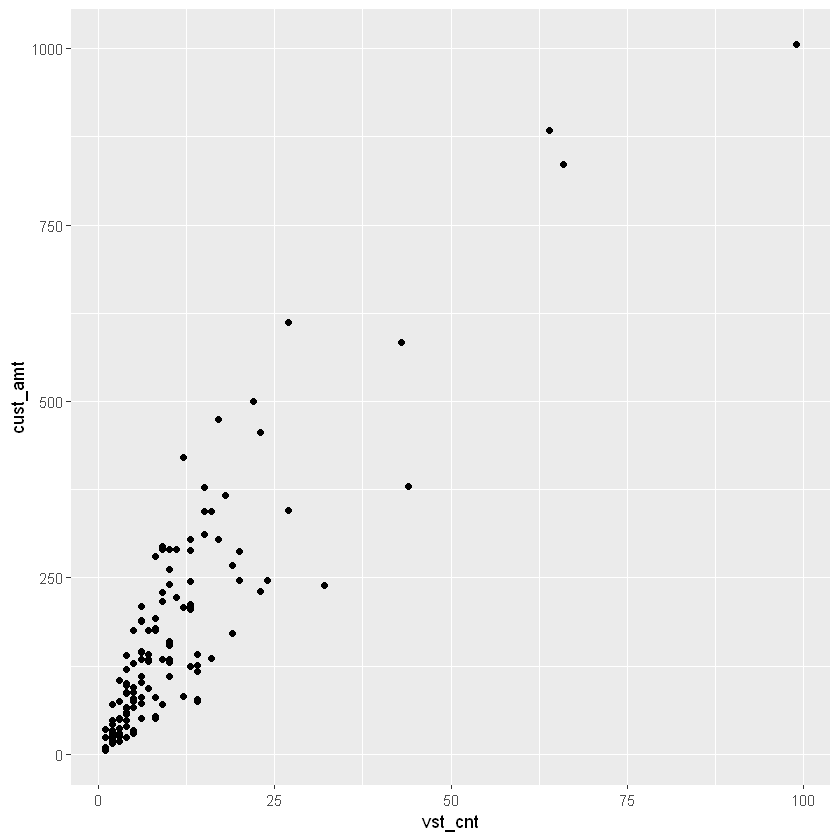

In [13]:
ggplot(data = df_sct_graph, aes(x = vst_cnt, y = cust_amt))+
geom_point()

Warning message:
"Removed 5 rows containing missing values (geom_point)."

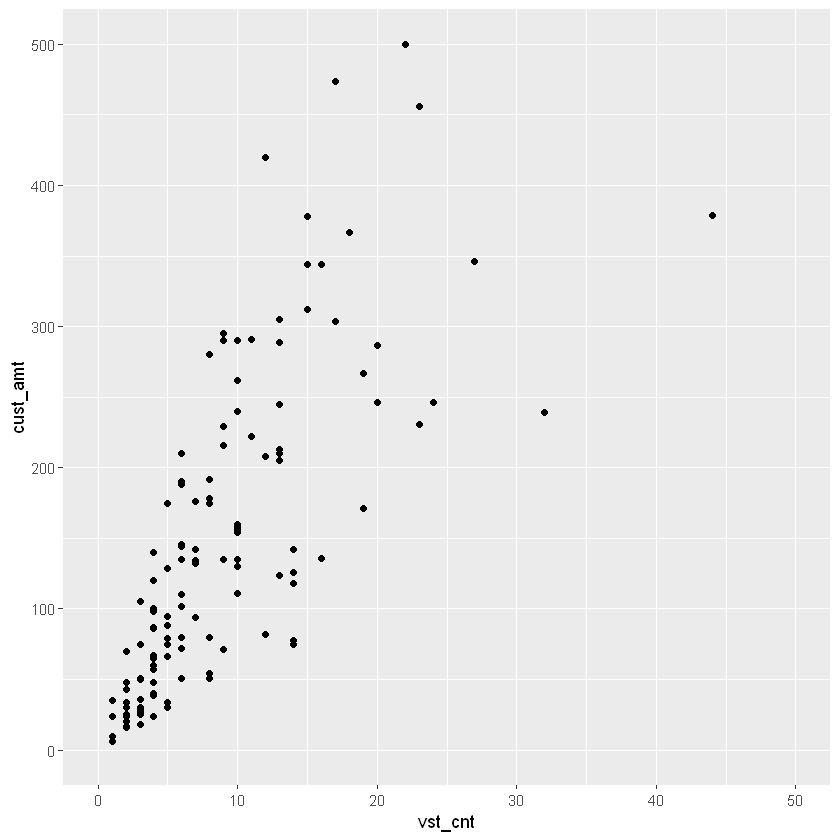

In [15]:
ggplot(data = df_sct_graph, aes(x = vst_cnt, y = cust_amt)) +
    geom_point() +
    xlim(0, 50) + ylim(0, 500)

In [16]:
head(customer_r)

customer_id,customer_name,phone_number,email,first_reg_date,sex_code,birth,job,zip_code
W1346506,고객71,010-1111-1181,scust71@sfnb.co.kr,19/09/01,F,19820922,자영업,122100
W1347648,고객72,010-1111-1182,scust72@sfnb.co.kr,19/09/04,M,19940812,학생,140100
W1347756,고객73,010-1111-1183,scust73@sfnb.co.kr,19/09/05,M,19931217,NA,152100
W1347984,고객74,010-1111-1184,scust74@sfnb.co.kr,19/09/06,M,19810822,자영업,130100
W1348303,고객75,010-1111-1185,scust75@sfnb.co.kr,19/09/07,M,19900611,NA,121100
W1348424,고객76,010-1111-1186,scust76@sfnb.co.kr,19/09/08,M,19730422,NA,139100


In [17]:
df_sct_graph2 <- inner_join(df_sct_graph, customer_r, by = "customer_id") %>%
    select(vst_cnt, cust_amt, sex_code)

head(df_sct_graph2) 

vst_cnt,cust_amt,sex_code
6,188,M
6,210,M
20,246,M
20,287,F
1,10,M
8,178,M


Warning message:
"Removed 5 rows containing missing values (geom_point)."

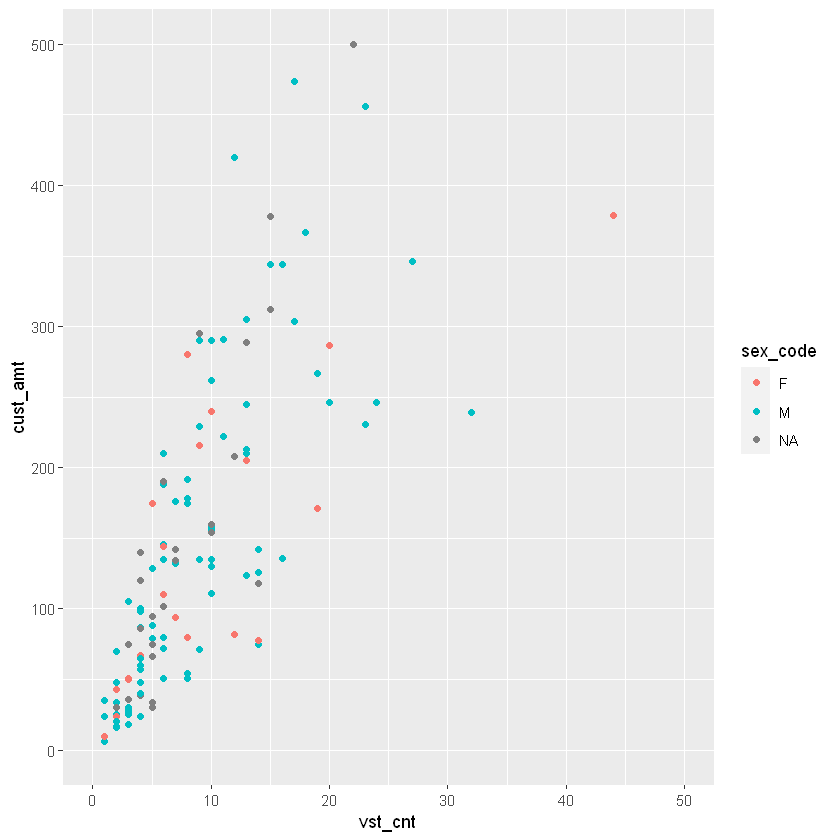

In [18]:
ggplot(data = df_sct_graph2, aes(x = vst_cnt, y = cust_amt, color = sex_code)) +
    geom_point() +
    xlim(0, 50) +
    ylim(0, 500)

In [20]:
df_branch_sales_1 <- inner_join(reservation_r, order_info_r, by = "reserv_no") %>%
    select(branch, sales) %>%
    arrange(branch, sales)

In [21]:
df_branch_sales_2 <- df_branch_sales_1 %>% group_by(branch) %>%
    summarise(amt = sum(sales) / 1000) %>%
    arrange(desc(amt))

df_branch_sales_2

branch,amt
강남,4074
영등포,1516
종로,1428
용산,1366
서초,1295
송파,1190
서대문,1180
동작,1149
관악,1101
노원,1054


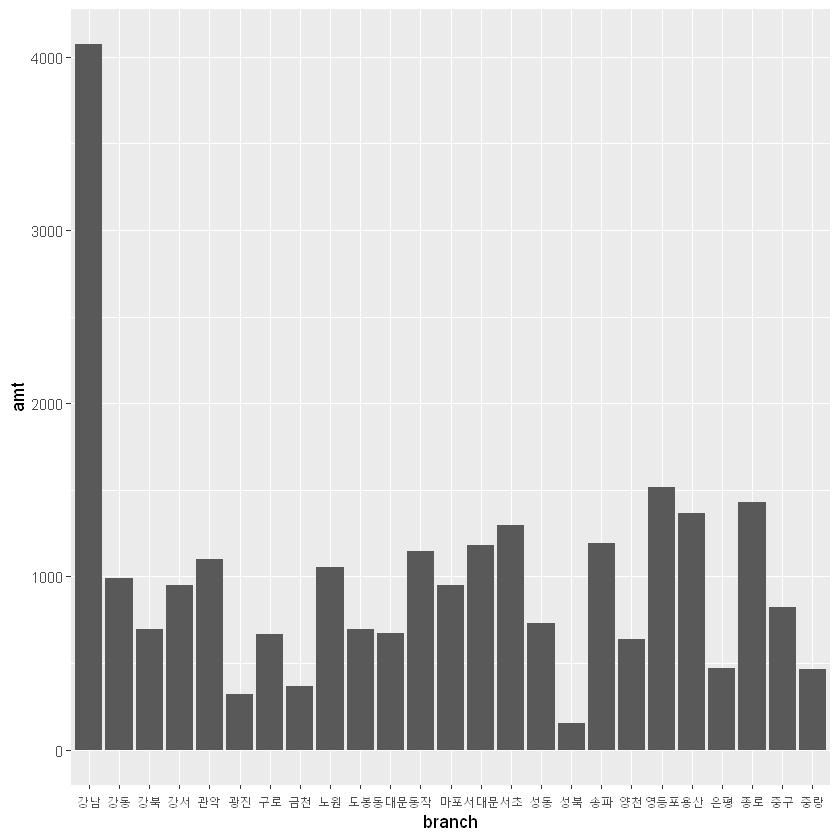

In [22]:
ggplot(df_branch_sales_2, aes(x = branch, y = amt)) + geom_bar(stat = "identity")

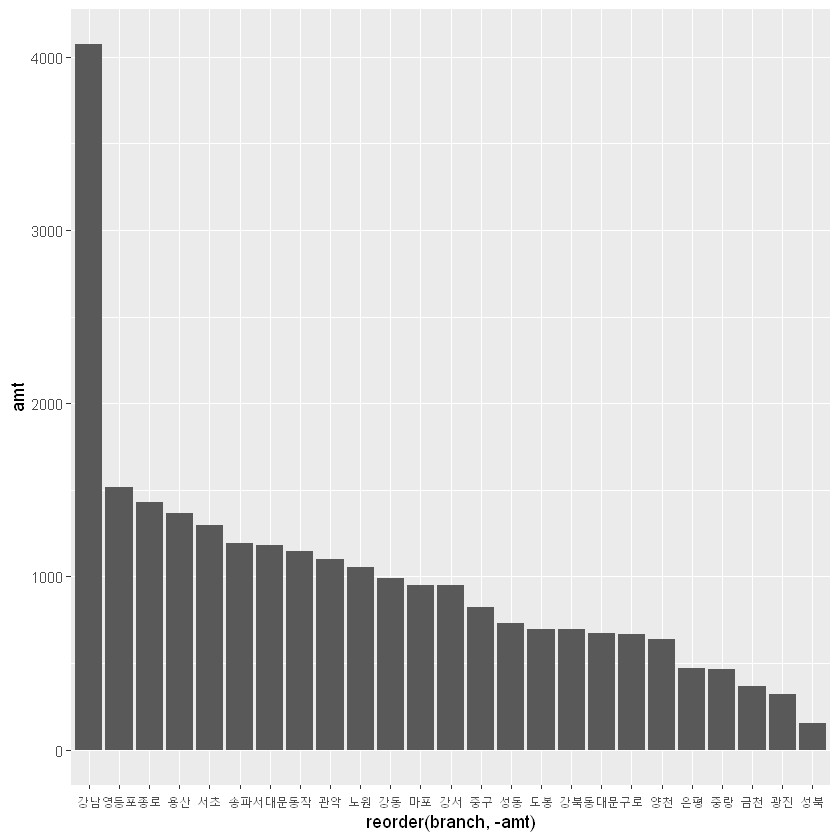

In [24]:
ggplot(df_branch_sales_2, aes(x = reorder(branch, -amt), y = amt)) +
    geom_bar(stat = "identity")

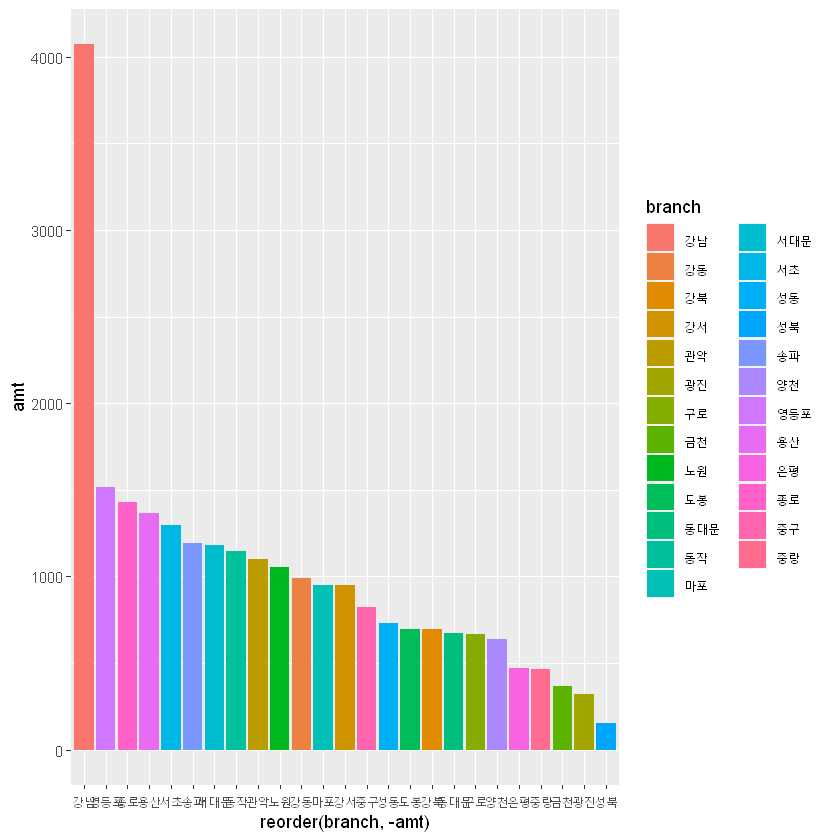

In [25]:
ggplot(df_branch_sales_2, aes(x = reorder(branch, -amt), y = amt, fill = branch)) +
    geom_bar(stat = "identity")

Warning message:
"Removed 20 rows containing missing values (position_stack)."

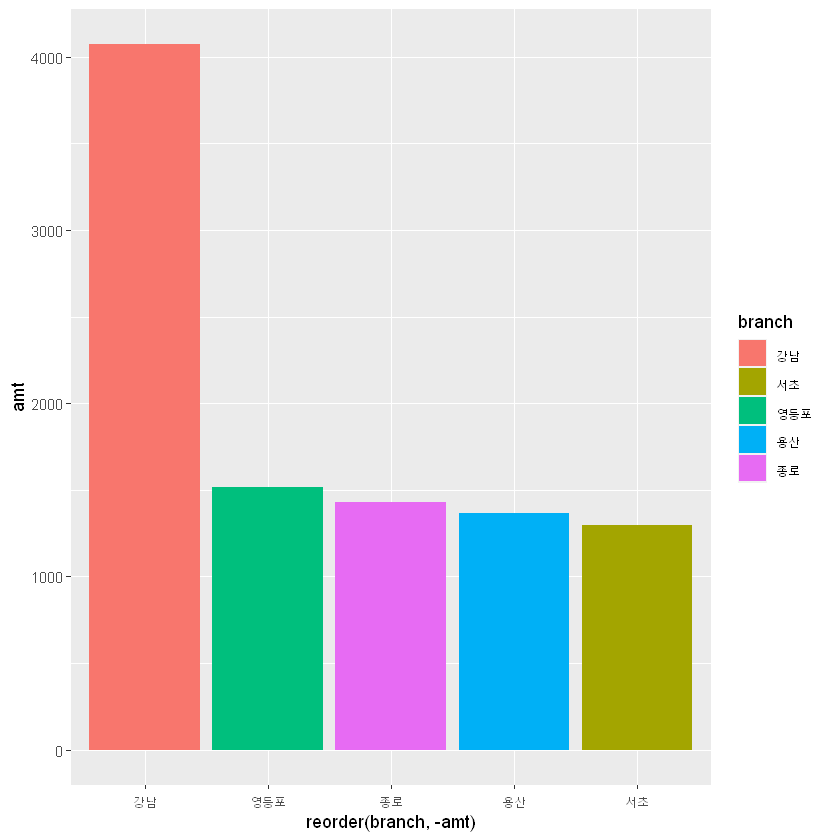

In [28]:
gg <- ggplot(df_branch_sales_2, aes(x=reorder(branch, -amt), y = amt, fill = branch))+
geom_bar(stat = 'identity') +
xlim(c('강남', '영등포', '종로', '용산', '서초'))
gg

Warning message:
"Removed 20 rows containing missing values (position_stack)."

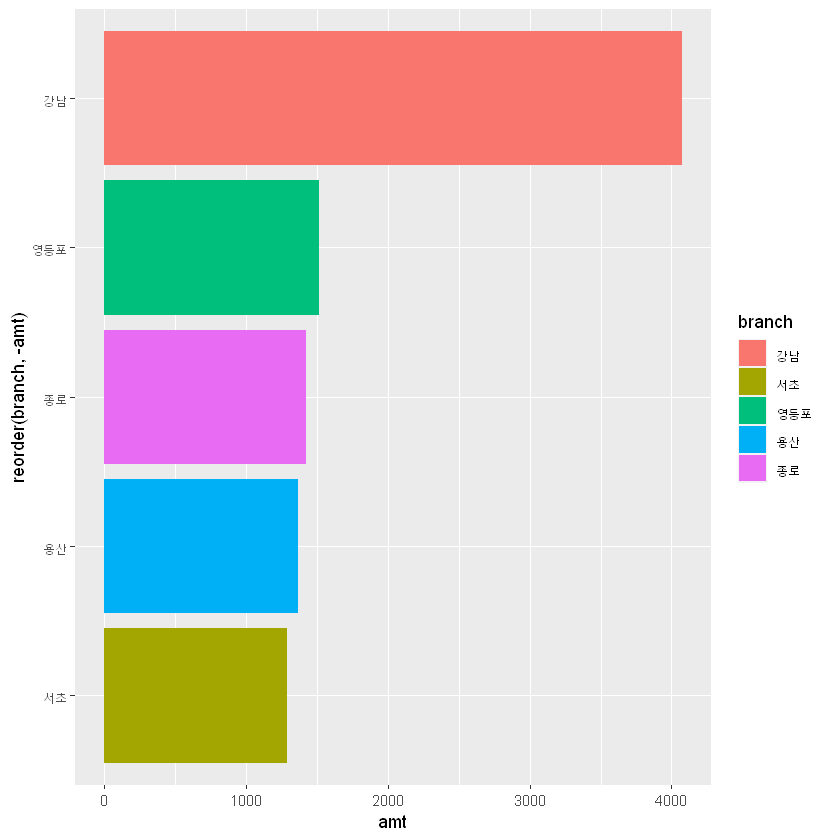

In [31]:
gg <- ggplot(df_branch_sales_2, aes(x=reorder(branch, -amt), y = amt, fill = branch))+
geom_bar(stat = 'identity') +
xlim(c('서초', '용산', '종로', '영등포', '강남'))

gg <- gg + coord_flip()
gg

Warning message:
"Removed 20 rows containing missing values (position_stack)."

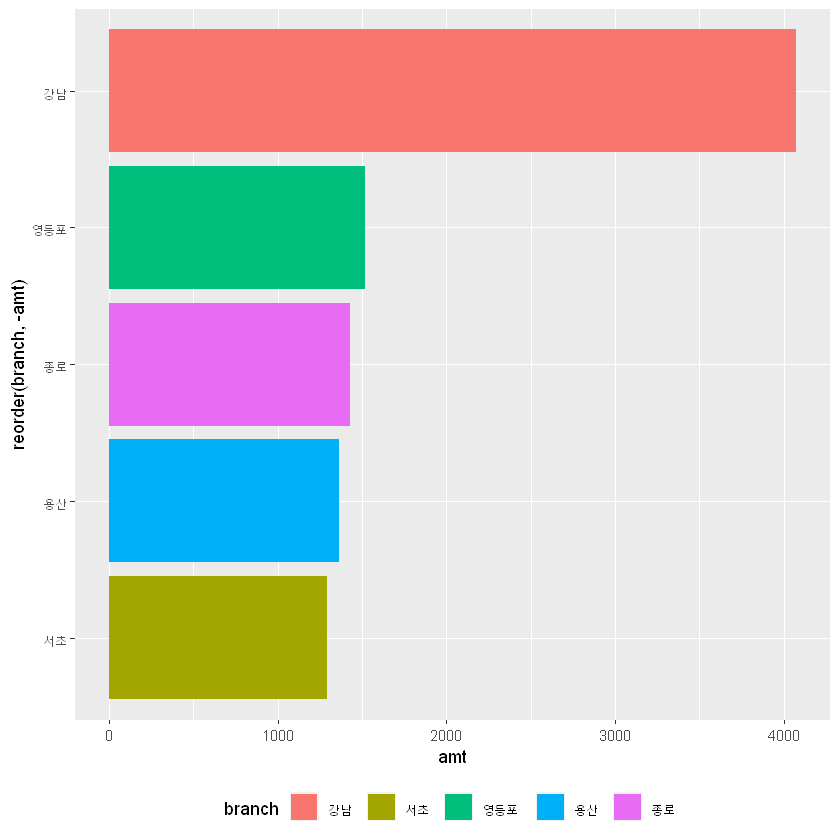

In [32]:
gg <- gg+theme(legend.position = 'bottom')
gg

Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.
Warning message:
"Removed 20 rows containing missing values (position_stack)."

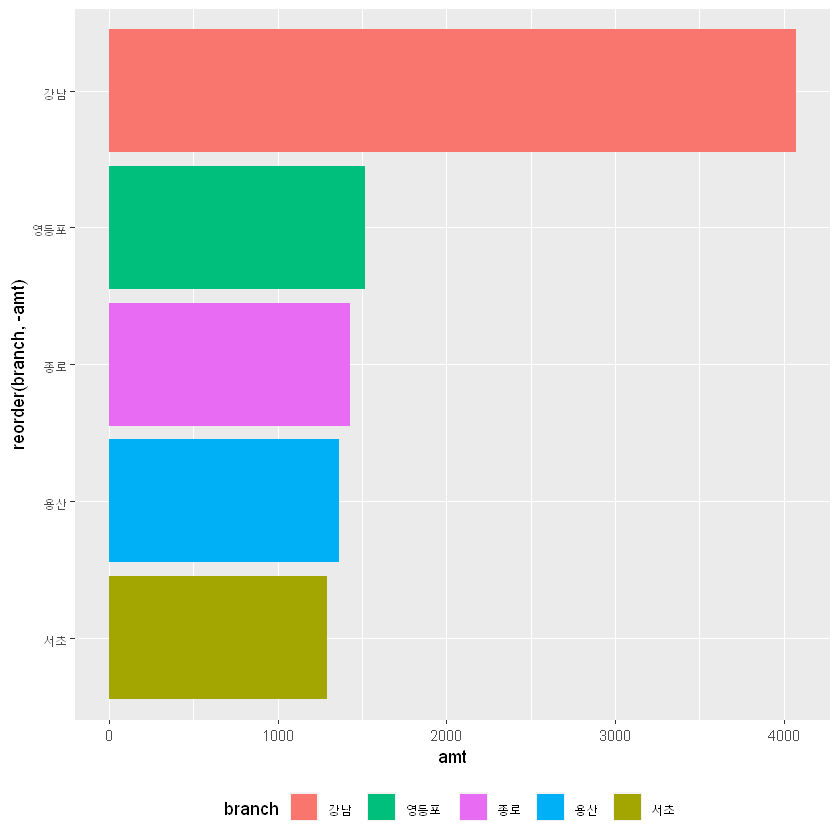

In [34]:
gg <- gg+scale_fill_discrete(breaks = c('강남', '영등포', '종로', '용산', '서초'))
gg

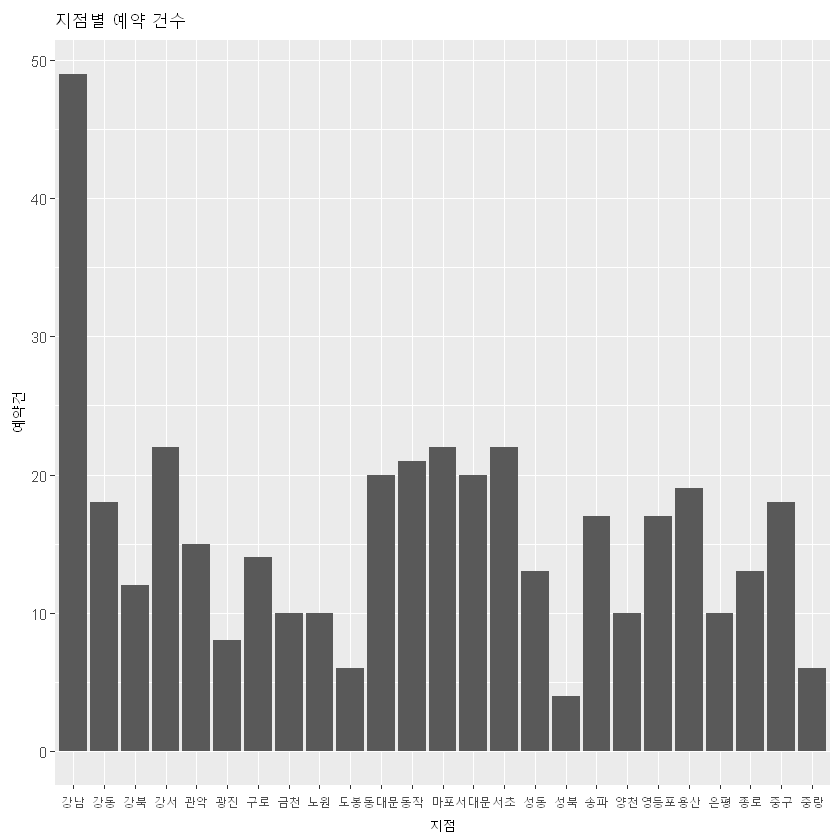

In [50]:
gg <- ggplot(data=reservation_r, aes(x=branch))+
geom_bar(stat = 'count')+
labs(title = '지점별 예약 건수', x = '지점', y = '예약건')
gg

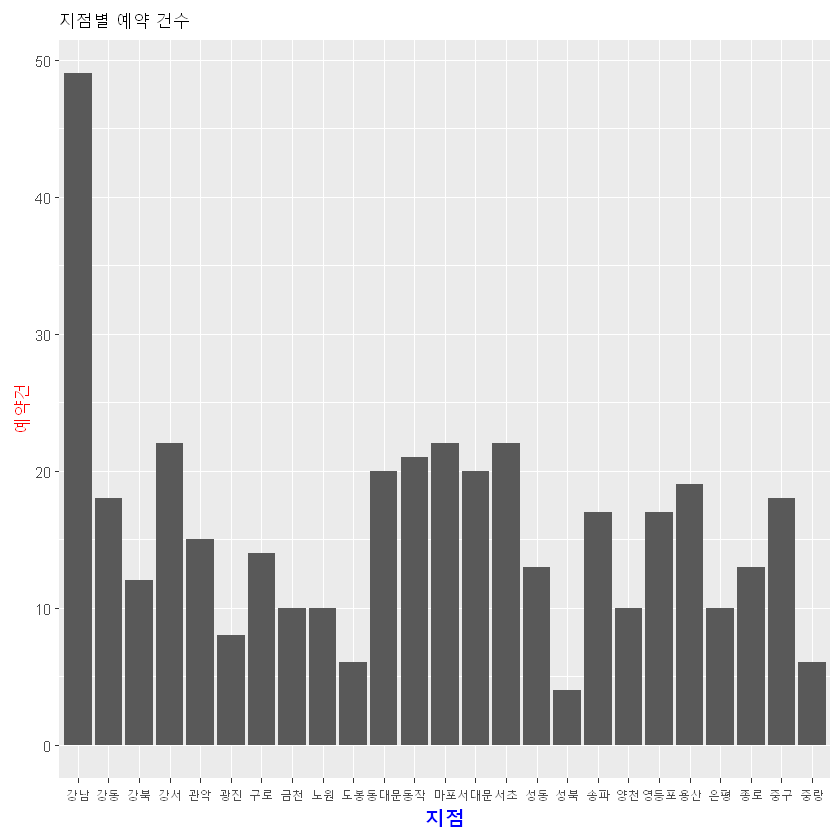

In [51]:
gg <- gg + theme(axis.title.x = element_text(size = 15,
                                            color = 'blue', 
                                            face = 'bold', 
                                            angle = 0), 
                 axis.title.y = element_text(size = 13, 
                                            color = 'red', 
                                            angle = 90))
gg


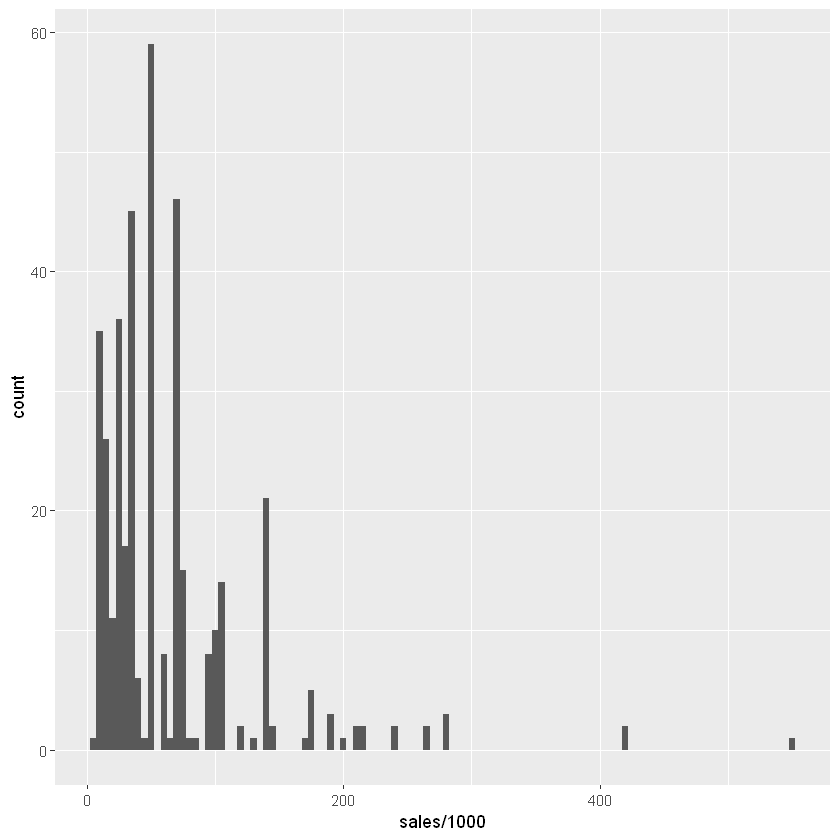

In [53]:
ggplot(data = order_info_r, aes(x = sales/1000))+
geom_histogram(binwidth = 5)

In [55]:
df_pie_graph <- inner_join(order_info_r, item_r, by = 'item_id') %>% 
group_by(item_id, product_name) %>% 
summarise(amt_item = sum(sales/1000)) %>% 
select(item_id, amt_item, product_name)

df_pie_graph

item_id,amt_item,product_name
M0001,5808,SPECIAL_SET
M0002,1968,PASTA
M0003,1666,PIZZA
M0004,1625,SEA_FOOD
M0005,9380,STEAK
M0006,2075,SALAD_BAR
M0007,525,SALAD
M0008,610,SANDWICH
M0009,856,WINE
M0010,444,JUICE


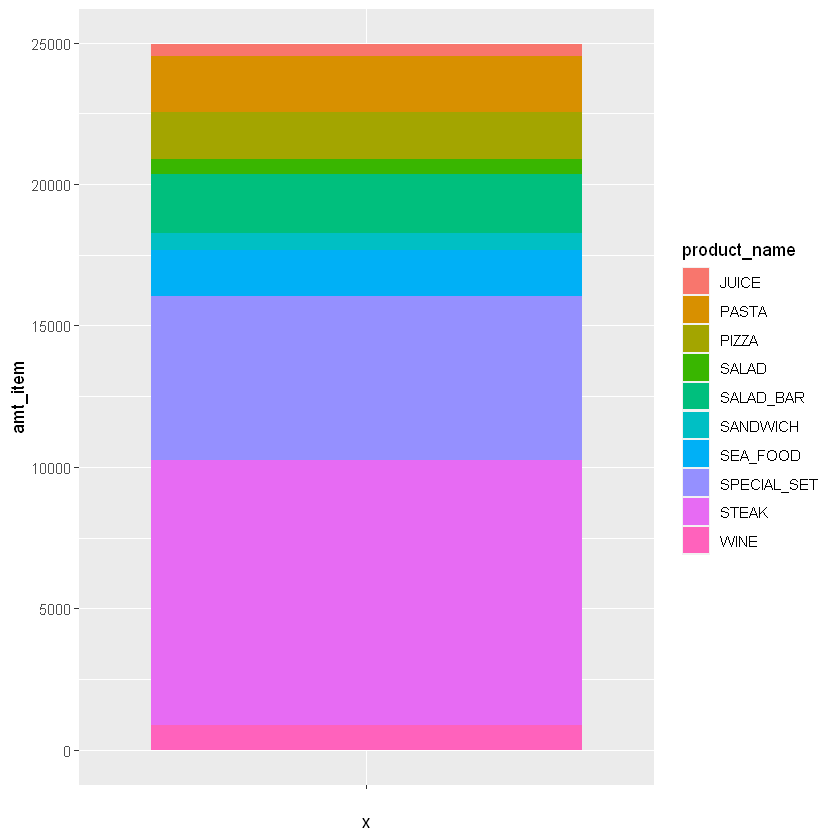

In [57]:
ggplot(df_pie_graph, aes(x = '', y = amt_item, fill = product_name))+
geom_bar(stat = 'identity')

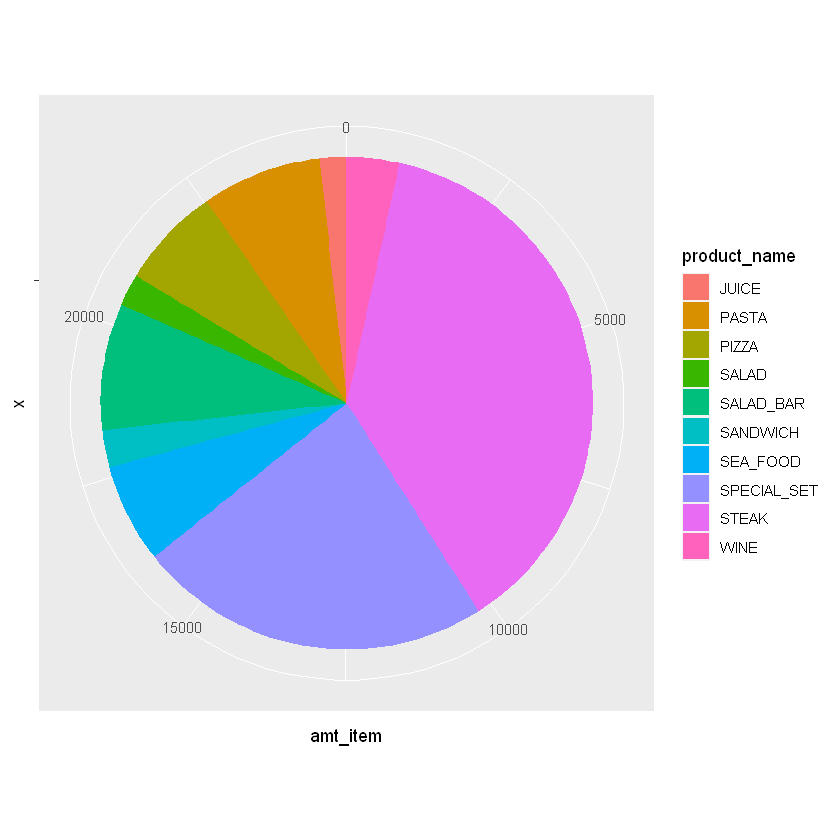

In [64]:
gg <- ggplot(df_pie_graph, aes(x = '', y = amt_item, fill = product_name))+
geom_bar(stat = 'identity')+
coord_polar('y', start = 0)
gg

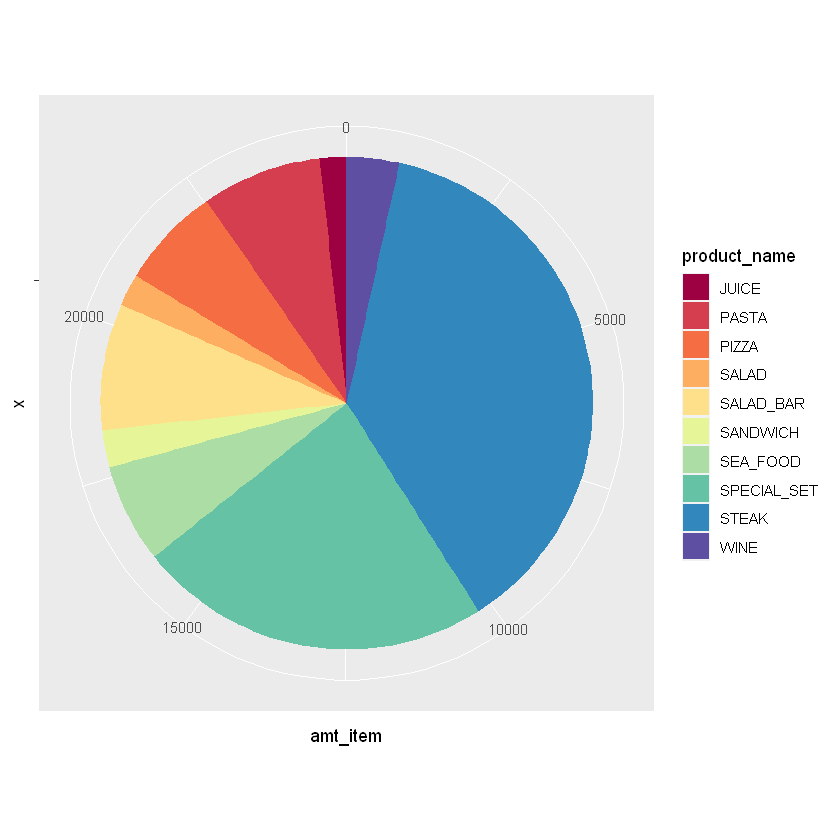

In [63]:
gg <- gg+scale_fill_brewer(palette = 'Spectral')
gg

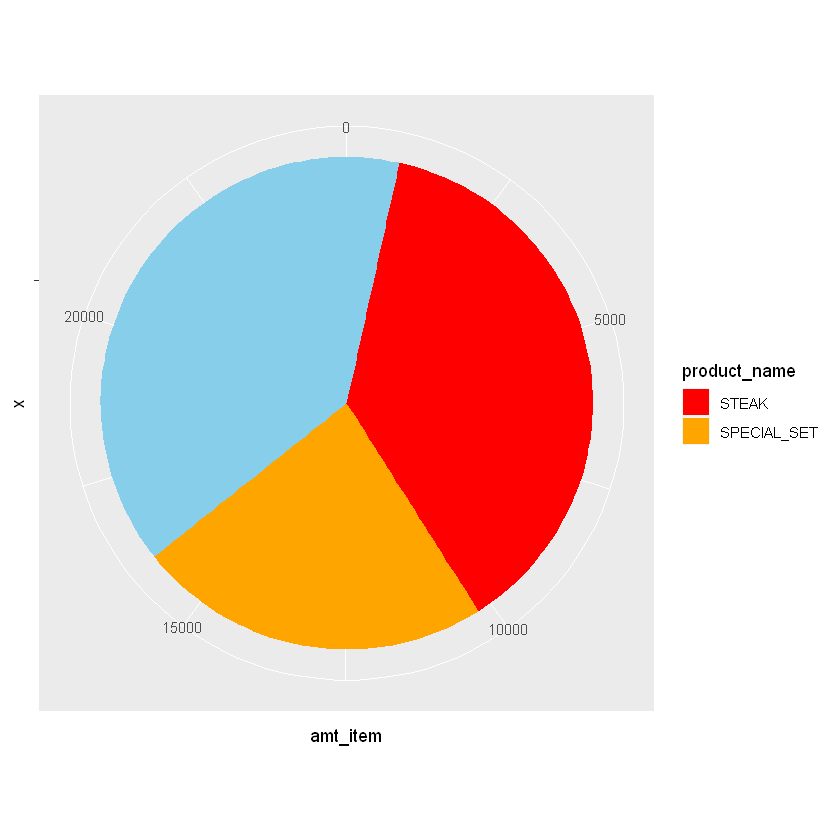

In [65]:
gg <- gg +
scale_fill_manual(values = c("STEAK" = "red", "SPECIAL_SET" = "orange", "SEA_FOOD" = "skyblue", "SANDWICH" = "skyblue", "SALAD_BAR" = "skyblue", "SALAD" = "skyblue", "PIZZA" = "skyblue", "PASTA" = "skyblue", "JUICE" = "skyblue", "WINE" = "skyblue"), breaks = c("STEAK", "SPECIAL_SET"))
gg